# Data eurostatu
- Časová řada má kvartální frekvenci
- Časovou řadu si zobrazujeme pomocí pandas, ve kterém si připravíme dataset a následně ho vykreslíme pomocí matplotlib.pyplot, což je knihovna pro tvorbu grafů

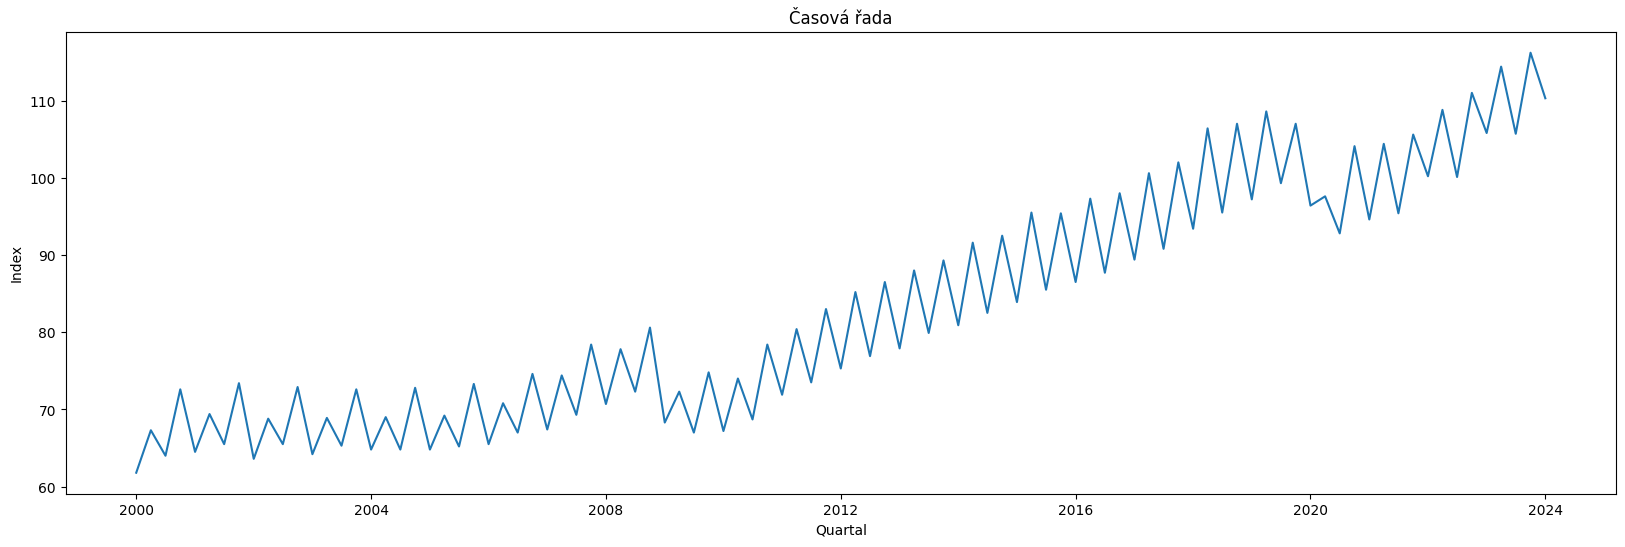

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# Načtení dat z CSV souboru
data = pd.read_csv('ei_isind_q_linear.csv')

# Filtrování dat podle několika podmínek
filtered_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

x = pd.to_datetime(filtered_data['TIME_PERIOD'])
y = filtered_data['OBS_VALUE']



plt.figure(figsize=(20, 6))
plt.ylabel('Index')
plt.xlabel('Quartal')
plt.title("Časová řada")
plt.plot(x,y)



# Dekompozice časové řady
- Dekompozice slouží k analýze časové řady
- Dekompozice je rozdělení časové řady na 4 složky
- Existují dva základní modely dekompozice
    - Aditivní -> 
        - Aditivní model je lineární a mění se konzistentně
    - Multiplikativní -> 
        - Multiplikativní model není lineární
- Časovou řadu rozkládáme na 3 nebo 4 složky:
    - Trendová složka
    - Cyklická složka (často zakomponuje do trendové složky)
    - Sezónní složka
    - Náhodná složka
- Dekompozice časové řady nám může pomoci k lepšímu pochopení časové řady
- Může nám pomoci při predikcích hodnot

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Převedení sloupce s časem na DATETIME
filtered_data['TIME_PERIOD'] = pd.to_datetime(filtered_data['TIME_PERIOD'])

# Nastavení sloupce s časem jako index
filtered_data.set_index('TIME_PERIOD', inplace=True)

# Ujistěte se, že data jsou seřazena podle času
filtered_data = filtered_data.sort_index()

# Výběr sloupce s hodnotami
data_values = filtered_data['OBS_VALUE']
# seasonal_decompose je funkce pro automatickou dekompozici časové řady,
# má dva modely - additive/multiplicative
dekompozice = seasonal_decompose(data_values, model="additive")

# Vizualizace dekompozice časové řady a residuí

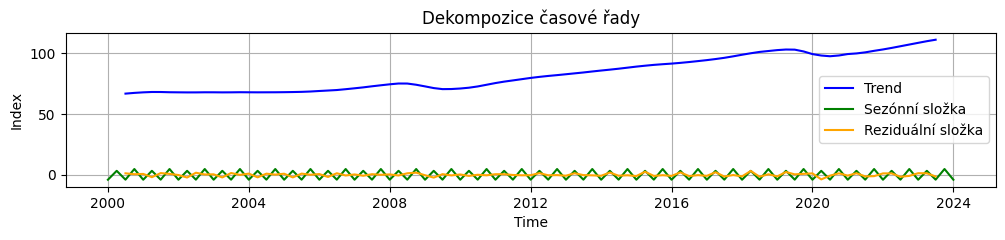

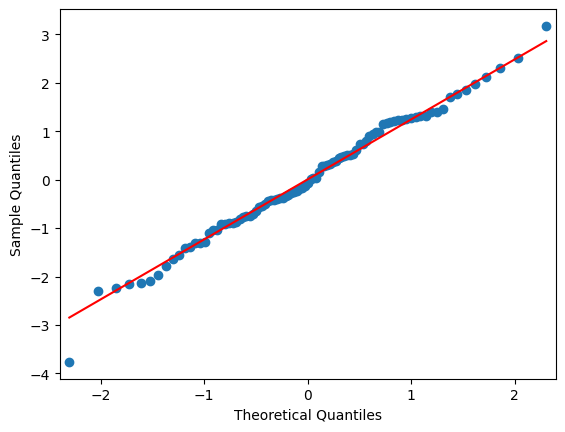

In [13]:
# Dekompozice
import statsmodels.api as sm

plt.figure(figsize=(12, 2))
plt.plot(dekompozice.trend, label='Trend', color='blue')
plt.plot(dekompozice.seasonal, label='Sezónní složka', color='green')
plt.plot(dekompozice.resid, label='Reziduální složka', color='orange')
plt.title('Dekompozice časové řady')
plt.ylabel('Index')
plt.xlabel('Time')
plt.grid(True)
plt.legend()

# Residua
residuals = dekompozice.resid.dropna()

sm.qqplot(residuals, line='s')
plt.show()

# Co jsou to Rezidua?
- Residua jsou náhodné variace nebo výkyvy, které zůstanou po odebrání trendu a sezónní složky
- Po odhalení residuí je lehčí porozumět chování a trendům časové řady
- Také pomáhá pro lepší predikci hodnot
- Vlastnosti:
    - Střední hodnota by měla být blízká nule, pokud je průměr daleko od nuly, může to naznačovat, že model špatně zachytil trend nebo sezónní složky
    - Rozptyl by měl být konstantní (homoskedasticita), pokud se rozptyl mění, nazýváme to heteroskedasticita, což může znamenat, že model nezachytil všechny důležité vzory
    - Normalita Rezidua by měla být přivližně normálně rozložena, pokud rezidua neodpovídají normálnímu rozdělení, může znamenat, že model není optimální nebo že jsou přitomny nějaké nelineární vztahy
- Jak s nimi pracovat?
    - Vizuální analýza -> Graf reziduí, QQ plot
    - Statistické testy:
        - Testy normality
        - Testy homoskedasticity

# Lineární regrese
- Lineární regrese je přímka, která hledá vztah mezi proměnnými
- Používá se pro predikci budoucích hodnot
- Yt = B0 + B1 * t
- Používáme funkce LinearRegression z balíčku sklearn.linear_model, pomocí kterého si vytvoříme model, který následně fitujeme a potom pomocí něho predikujeme hodnoty


In [56]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Filtrace dat
filtered_data = data.loc[
    (data['unit'] == 'I21') & 
    (data['geo'] == 'DE') & 
    (data['s_adj'] == 'NSA') & 
    (data['indic_bt'] == 'WAGE') & 
    (data['nace_r2'] == 'C')
]

# Převedení TIME_PERIOD na datetime a následně na číselné hodnoty (např. pořadové číslo dne)
filtered_data['TIME_PERIOD'] = pd.to_datetime(filtered_data['TIME_PERIOD'])
x = np.array(filtered_data['TIME_PERIOD'].map(pd.Timestamp.toordinal)).reshape((-1, 1))

# Vytvoření y jako OBS_VALUE
y = np.array(filtered_data['OBS_VALUE'])

# Lineární regrese
model = LinearRegression().fit(x, y)
r2 = model.score(x, y)
print(f"Determinační koeficient: {r2}")

y_pred = model.predict(x)

Determinační koeficient: 0.86012369474415


# Vizualizace predikce pomocí Lineární regrese

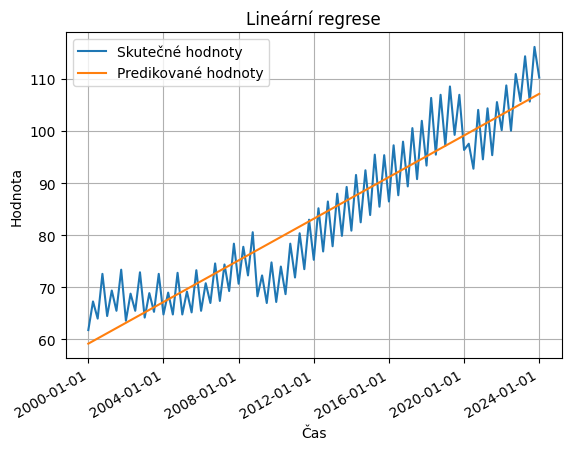

In [57]:
# Vytvoření grafu
plt.plot(filtered_data['TIME_PERIOD'], y, label='Skutečné hodnoty')
plt.plot(filtered_data['TIME_PERIOD'], y_pred, label='Predikované hodnoty')
plt.xlabel('Čas')
plt.ylabel('Hodnota')
plt.title('Lineární regrese')

# Nastavení formátu data na ose x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gcf().autofmt_xdate()  # Automatické otáčení popisů na ose x

plt.legend()
plt.grid(True)
plt.show()

# Segmentace pomocí lineárni regrese
- Například pokud chceme zjistit změnu v časové řadě po nějaké události
- Získáme nový pohled na časovou řadu, kterou právě zkoumáme
- Segmentace se nehodí pokud časová řada má stálé chování a nemění se (např. pokud stále roste ve stejném sklonu)


## Segmentace

In [62]:
segments_definitions = [
    ('2006-01-01', '2008-12-31'),  # První segment
    ('2009-01-01', '2011-12-31'),  # Druhý segment
    ('2021-01-01', '2023-12-31'),  # Třetí segment
]


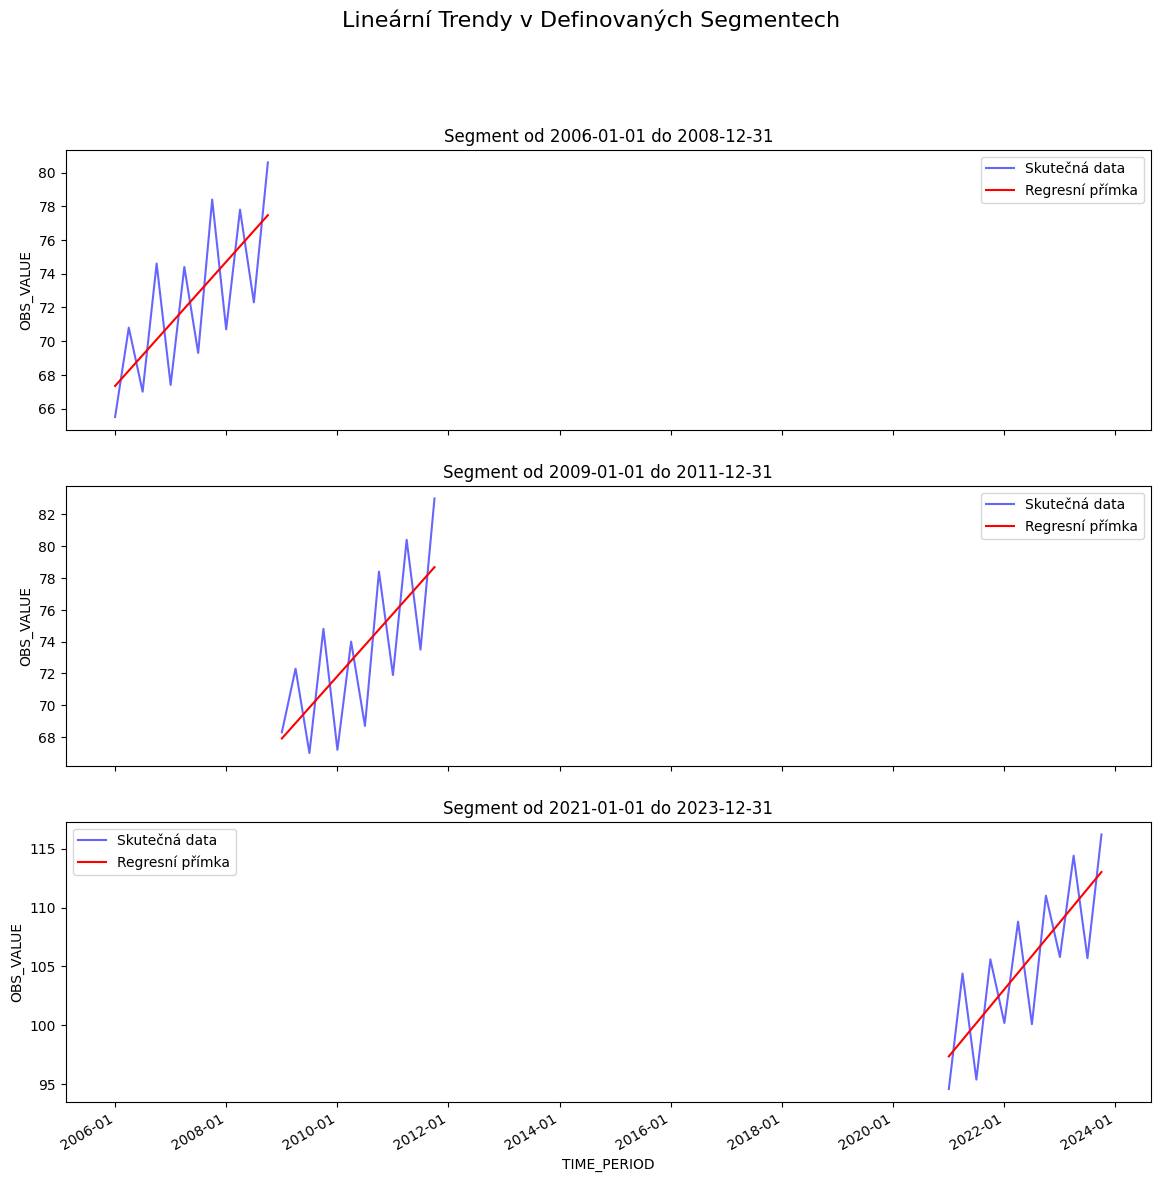

Sklon regresní přímky pro segment od 2006-01-01 do 2008-12-31: 0.010091219387122954
Sklon regresní přímky pro segment od 2009-01-01 do 2011-12-31: 0.0107349636728184
Sklon regresní přímky pro segment od 2021-01-01 do 2023-12-31: 0.015598839681416586


In [66]:
# Příprava grafu
fig, axs = plt.subplots(len(segments_definitions), 1, figsize=(14, 14), sharex=True)
fig.suptitle('Lineární Trendy v Definovaných Segmentech', fontsize=16)

# Výpis sklonů
slopes = []

for ax, (start_date, end_date) in zip(axs, segments_definitions):
    # Filtrace dat podle segmentu
    segment = filtered_data.loc[(filtered_data['TIME_PERIOD'] >= start_date) & (filtered_data['TIME_PERIOD'] <= end_date)]
    
    # Převedení na číselné hodnoty
    x_segment = np.array(segment['TIME_PERIOD'].map(pd.Timestamp.toordinal)).reshape((-1, 1))
    y_segment = np.array(segment['OBS_VALUE'])
    
    # Lineární regrese
    model_segment = LinearRegression().fit(x_segment, y_segment)
    y_pred_segment = model_segment.predict(x_segment)
    
    # Uložení sklonu
    slopes.append(model_segment.coef_[0])
    
    # Vykreslení dat a regresní přímky
    ax.plot(segment['TIME_PERIOD'], y_segment, label='Skutečná data', color='blue', alpha=0.6)
    ax.plot(segment['TIME_PERIOD'], y_pred_segment, color='red', label='Regresní přímka')
    ax.set_title(f'Segment od {start_date} do {end_date}')
    ax.set_ylabel('OBS_VALUE')
    ax.legend()

# Nastavení formátu osy x
axs[-1].set_xlabel('TIME_PERIOD')
axs[-1].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()

# Zobrazení grafu
plt.show()

# Výpis sklonů
for (start_date, end_date), slope in zip(segments_definitions, slopes):
    print(f'Sklon regresní přímky pro segment od {start_date} do {end_date}: {slope}')